## SupraMolSim Analysis workflows focus on exploting its core methods (showcased in general workflows) within parameter sweeps to explore the imaging space!


### In order to do so, we will use the Experiment module, desinged to ease the navigation of SupraMolSim functionallity at any point in the workflow.
The Experiment itself allows you to initialise a demo experiment


In [13]:
from supramolsim.experiments import create_experiment_parametrisation
from supramolsim.analysis.scripts import parameter_sweep_reps, analyse_sweep

In [14]:
# generated at user interface or stored programatically
selected_mods = dict(
    STED_demo=None,
    Confocal_demo=None,
)
structure_and_labels = dict(
    structure_id = "7R5K",
    structure_label = "7R5K_Nup96_Cterminal_direct",
    fluorophore_id = "AF647"
)
defects_eps_d = dict(
    eps1=300,
    eps2=600
)
savging = dict(
    experiment_id = "SupraMolSim_experiment",
    output_directory = "",
    save=False
)

sweep_pars = dict(
    labelling_efficiency=dict(
        start=0.3,
        end=1,
        nintervals=3, 
        ideal=1
    ),
    defects=dict(
        start=0,
        end=0.5,
        nintervals=3,
        ideal=0
    )
)
total_combinations = sweep_pars["defects"]["nintervals"] * sweep_pars["labelling_efficiency"]["nintervals"]

Experiment_generator = create_experiment_parametrisation(
    structure_and_labels=structure_and_labels,
    modalities_acquisition=selected_mods,
    savging=savging,
    defects_params=defects_eps_d,
    use_locals=True
)

Building objects
Loading structure.
7R5K already exists. Skipping...
Parsing structure. This might take a few seconds...
Building structure for: 7R5K: Human nuclear pore complex (constricted)...
Structure Loaded!
Searching for sequence: ELAVGSL
Generating symmetry partners for epitopes parsed
Initialising default field
AF647 Nup96_direct
scaling factor set to 0.001
Creating channel for each fluorophore
AF647
emission for STED_demo set to constant
Generating unitary analytical PSF stack with shape [120, 120, 40] and standard deviations [3.9, 3.9, 5]
Creating channel for each fluorophore
AF647
emission for Confocal_demo set to constant
Generating unitary analytical PSF stack with shape [150, 150, 150] and standard deviations [9.4, 9.4, 33.1]
No parameters set


In [15]:
replicas = 3
sweep_out, sweep_out_pars, ref_out = parameter_sweep_reps(
    Experiment=Experiment_generator,
    sweep_parameters=sweep_pars,
    repetitions=replicas)

{'labelling_efficiency': 1, 'defects': 0}
Searching for sequence: ELAVGSL
Generating symmetry partners for epitopes parsed
Initialising default field
AF647 Nup96_direct
scaling factor set to 0.001
No acquisition parameters defined. Using default on all modalities
Simulating imaging from modality: STED_demo in channel ch0
Average number of photons per frame: 100.0
size of psf is: (120, 120, 40)


100%|██████████| 10/10 [00:01<00:00,  5.47it/s]


Binning image stack


100%|██████████| 10/10 [00:00<00:00, 1197.62it/s]


Adding noise
Simulating imaging from modality: Confocal_demo in channel ch0
Average number of photons per frame: 100.0
size of psf is: (150, 150, 150)


100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


Binning image stack


100%|██████████| 10/10 [00:00<00:00, 9497.97it/s]


Adding noise
Parameter sweep


100%|██████████| 9/9 [02:42<00:00, 18.10s/it]


In [16]:
sweep_analyse_pars = dict(
    STED_demo=dict(
        metric="ssim",
        subregion=[20,44]
    ),
    Confocal_demo=dict(
        metric="ssim",
        subregion=False
    )
)
data_frame, qries, references = analyse_sweep(
    sweep_out,
    sweep_out_pars,
    ref_out,
    sweep_analyse_pars)

In [17]:
from supramolsim.analysis._plots import show_references, show_example
from supramolsim.analysis._plots import pivot_dataframes, sns_heatmap_pivots

['Labelling_efficiency', 'Fractional_defect']
    Labelling_efficiency  Fractional_defect  Condition    Metric replica
0                   0.30               0.00  STED_demo  0.498501       0
2                   0.30               0.00  STED_demo  0.452661       1
4                   0.30               0.00  STED_demo  0.380664       2
6                   0.30               0.25  STED_demo  0.398243       0
8                   0.30               0.25  STED_demo  0.357332       1
10                  0.30               0.25  STED_demo  0.426828       2
12                  0.30               0.50  STED_demo  0.314754       0
14                  0.30               0.50  STED_demo  0.268731       1
16                  0.30               0.50  STED_demo  0.375369       2
18                  0.65               0.00  STED_demo  0.600158       0
20                  0.65               0.00  STED_demo  0.659976       1
22                  0.65               0.00  STED_demo  0.592918       2
24   

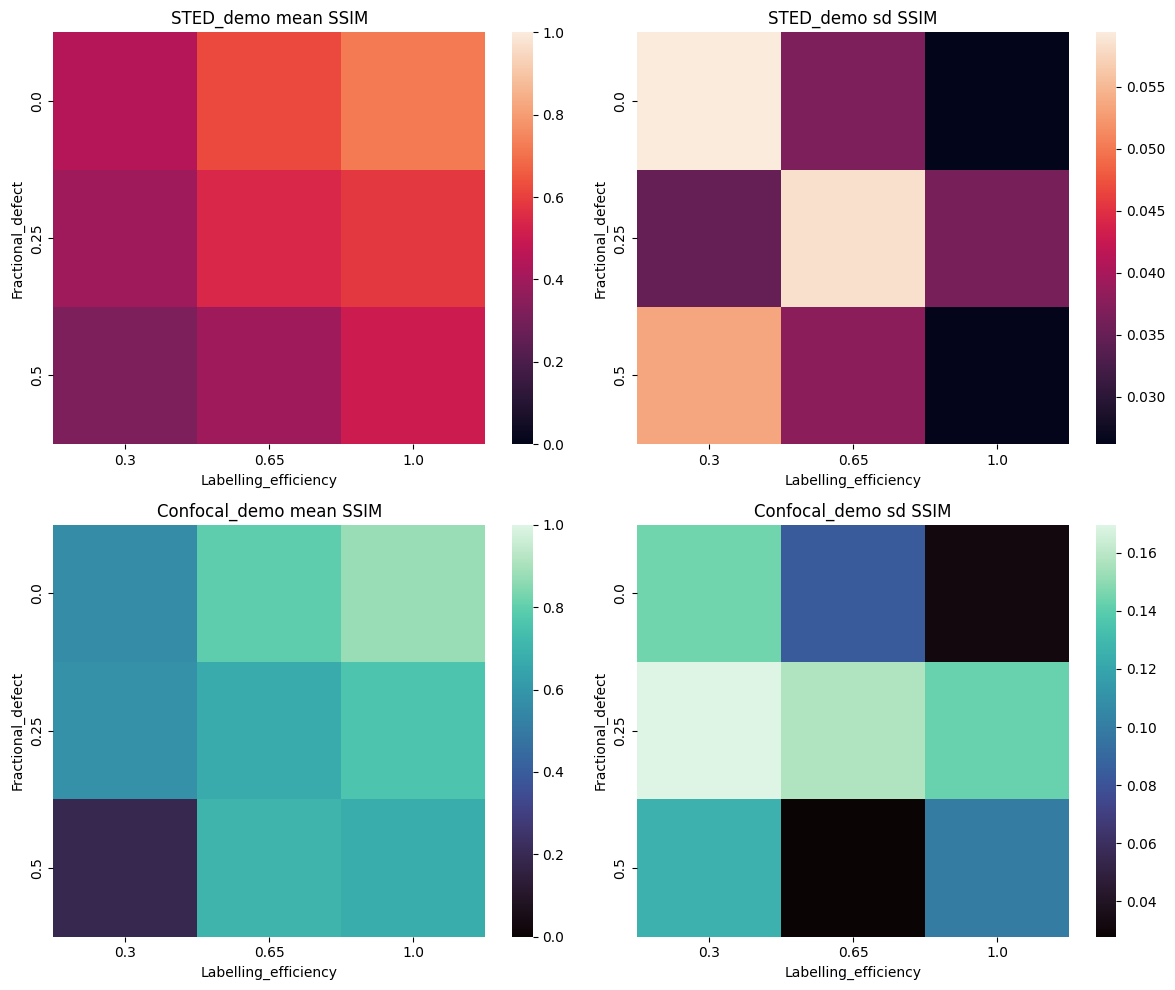

In [18]:
param_names = list(data_frame.columns[0:2])
print(param_names)
dataframe_pivots = pivot_dataframes(data_frame, param_names)
conditions_cmaps = dict(
    Confocal_demo="mako",
    STED_demo="rocket"
)
sns_heatmap_pivots(df_pivots=dataframe_pivots, conditions_cmaps=conditions_cmaps, annotations=False)